# MLB Modern Era Salary Analysis

[Lahman’s Baseball Database](http://seanlahman.com/baseball-archive/statistics/) contains complete batting and pitching statistics from 1871 to 2013, plus fielding statistics, standings, team stats, managerial records, post-season data, and more.



## Objective

One of the topics covered in **Lahman's Baseball Database** is MLB annual salaries. This notebook provides a sample analysis that explores trends in player salaries. Several questions are addressed:

1. What is the average salary increase per league since 1985?
2. What is the average salary increase per league since 1985?
3. Can we predict future average salary increase per league?


## Prepare Environment
Bootstrap notebook with necessary notebook and library dependencies.

### Prerequisites 
This notebook requires the installation of the following software dependencies:
```
!pip install statsmodels
```

In [22]:
# Provide the inline code necessary for loading any required libraries

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

## Load the Data

1. Visit the [Lahman’s Baseball Database](http://seanlahman.com/baseball-archive/statistics/) and download the latest data. After unzipping the package, upload the **Salaries.csv** file to your workbench.
2. Import the latest MLB Salary data and take a peak at the dataset.

<div class="alert" style="border: 1px solid #aaa; background: radial-gradient(ellipse at center, #ffffff 50%, #eee 100%);">
<div class="row">
    <div class="col-sm-1"><img src="https://knowledgeanyhow.org/static/images/favicon_32x32.png" style="margin-top: -6px"/></div>
    <div class="col-sm-11">In IBM Knowledge Anyhow Workbench, you can drag/drop the file on your workbench browser tab to simplify the uploading process.</div>
</div>
</div>

In [24]:
import pandas as pd
df_mlb_Salaries = pd.read_csv('/resources/mlb_Salaries_2011.csv').dropna()
df_mlb_Salaries.describe()

,yearID,salary
count,23141.000000,23141.000000
mean,1998.941143,1798885.680135
std,7.764378,2970955.921486
min,1985.000000,0.000000
25%,1993.000000,240000.000000
50%,1999.000000,500000.000000
75%,2006.000000,2000000.000000
max,2012.000000,33000000.000000


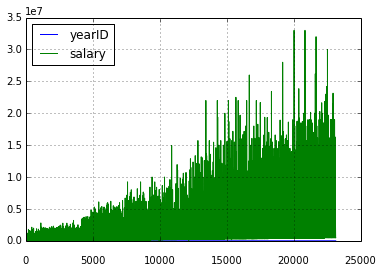

In [25]:
df_mlb_Salaries.plot()

In [26]:
df_mlb_Salaries.tail()

,yearID,teamID,lgID,playerID,salary
23136,2012,WAS,NL,detwiro01,485000
23137,2012,WAS,NL,stammcr01,485000
23138,2012,WAS,NL,marrech01,481000
23139,2012,WAS,NL,matthry01,481000
23140,2012,WAS,NL,lombast02,481000


### Observations
Based on the 2013 data:

* Between 1985 and 2013 there are 23,956 Salary records.
* The average annual Salary across all of MLB for the last 28 years is 1.8M USD.
* The largest annual Salary across all of MLB for the last 28 years is 33M USD.

## Question 1: Average Salary Per League
What is the average salary increase per league since 1985?

### Data Munging

#### Step A: Partition the data by league

In [27]:
american_league = df_mlb_Salaries.query('lgID == "AL"')
national_league = df_mlb_Salaries.query('lgID == "NL"')

#### Step B: Create a pivot table for salaries per year per league

In [28]:
american_league_avg_annual_salary = american_league.groupby(['yearID']).mean()[['salary']]
national_league_avg_annual_salary = national_league.groupby(['yearID']).mean()[['salary']]

#### Step C: Create a Dataframe depicting average annual salaries per league per year.

In [29]:
al = pd.Series(american_league_avg_annual_salary.salary, name="American League")
nl = pd.Series(national_league_avg_annual_salary.salary, name="National League")

In [30]:
df_league_salary_history = pd.concat([al, nl], axis=1)
df_league_salary_history.head()

,American League,National League
yearID,,
1985,455597,500249
1986,402337,433925
1987,441846,427857
1988,453901,452374
1989,502052,511116


### Data Exploration
Plot our results and compare annual league salary averages.

In [31]:
df_league_salary_history.describe()

,American League,National League
count,28.000000,28.000000
mean,1835922.535714,1698344.607143
std,1149009.237987,1016000.909183
min,402337.000000,427857.000000
25%,990269.750000,887920.250000
50%,1434191.000000,1338269.000000
75%,2783420.250000,2615311.000000
max,3662264.000000,3277278.000000


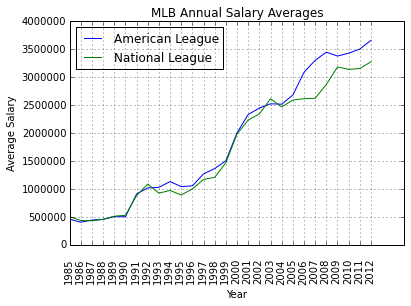

In [32]:
df_league_salary_history.plot()
plt.rcParams['xtick.major.pad']='10'
plt.title('MLB Annual Salary Averages')
plt.xlabel('Year')
plt.ylabel('Average Salary')
yvalues = american_league_avg_annual_salary.index
plt.xticks(yvalues, rotation='vertical')
plt.show()

### Observations

* Between 1985 and 2013 the American League has paid an average of 200K USD more than the National League.
* In 2004, the annual salaries per league diverged with a greater degree of seperation.


 <div class="alert alert-info">In 2004, [Texas traded A-Rod to the NY Yankees](http://sports.espn.go.com/mlb/news/story?id=1735937). This transaction could have triggered the abnormal divergence.
</div>

## Question 2: Average Annual Salary Increases Per League
What is the average salary increase per league since 1985?

### Data Munging

#### Step A: Define Helper Methods

In [33]:
def annual_salary_delta(previous_year_salary, current_year_salary):
    '''Compute annual salary delta.'''
    return current_year_salary - previous_year_salary

def annual_league_salary_increases(salaries):
    '''Return list of annual salary deltas for a series of league salaries.'''
    salincperyr = []
    for idx, val in enumerate(salaries):
        if idx == 0:
            salincperyr.append(0)
        elif idx == len(salaries)-1:
            salincperyr.append(0)
        else:
            salincperyr.append(annual_salary_delta(salaries.iloc[idx-1],
                                               salaries.iloc[idx]))
    return salincperyr

#### Step B: Extend Dataset
Compute Salary increases per year.

In [34]:
tablecols = []
tablecols.append(yvalues)
tablecols.append(df_league_salary_history["American League"].tolist())
tablecols.append(df_league_salary_history["National League"].tolist())
tablecols.append(annual_league_salary_increases(df_league_salary_history["American League"]))
tablecols.append(annual_league_salary_increases(df_league_salary_history["National League"]))
df_league_salary_detailed_history = pd.DataFrame(tablecols).T
df_league_salary_detailed_history.columns = ['Year','alAvgSalary', 'nlAvgSalary','alAnnualSalaryIncrease', 'nlAnnualSalaryIncrease']
df_league_salary_detailed_history.set_index(df_league_salary_detailed_history['Year'])
df_league_salary_detailed_history

,Year,alAvgSalary,nlAvgSalary,alAnnualSalaryIncrease,nlAnnualSalaryIncrease
0,1985,455597,500249,0,0
1,1986,402337,433925,-53260,-66324
2,1987,441846,427857,39509,-6068
3,1988,453901,452374,12055,24517
4,1989,502052,511116,48151,58742
5,1990,500415,525913,-1637,14797
6,1991,908126,879587,407711,353674
7,1992,1017651,1085608,109525,206021
8,1993,1028575,923882,10924,-161726
9,1994,1130703,971003,102128,47121


### Explore Results
Plot comparison between annual league salary increases per year.

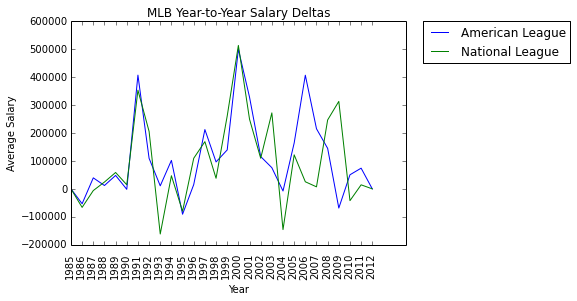

In [35]:
x = df_league_salary_detailed_history['Year']
plt.plot(x,df_league_salary_detailed_history["alAnnualSalaryIncrease"], label="American League")
plt.plot(x,df_league_salary_detailed_history["nlAnnualSalaryIncrease"], label="National League")
plt.title('MLB Year-to-Year Salary Deltas')
plt.xlabel('Year')
plt.ylabel('Average Salary')
xvalues = american_league_avg_annual_salary.index
plt.xticks(xvalues, rotation='vertical')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

### Observations

* Between 1985 and 2002 the leagues on average tended to offer similiar annual salary increases.
* After 2002 it would seem that the leagues were more reactionary as they tend to handle increases in opposite manners.

## Question 3: Future Predictions
Can we predict future average salary increase per league?

### Data Munging

#### Step A: Define Helper Methods

In [36]:
def create_season_opener_datetime_index(date_series):
    '''Return a series of datetime index objects for a series of date strings'''
    import datetime
    import pandas as pd
    dates = []
    for i in date_series:
        d = datetime.date(i,4,1)
        dates.append(d)
    return pd.DatetimeIndex(dates)

#### Step B: Perform ETL
We have several data structures we need to transform in order to perform predictive analytics. Most notably is the need to have our data structures indexed using a datetime object. Our original data contains only the year for a season but our algorithms require an actual date so we will assume April 1st for each year as the season opener.

In [37]:
season_opener_dates = create_season_opener_datetime_index(df_league_salary_detailed_history['Year'])
df_al_annual_salary_inc = pd.DataFrame(
                                df_league_salary_detailed_history["alAnnualSalaryIncrease"].tolist(),
                                index=season_opener_dates,
                                columns=["alAnnualSalaryIncrease"]
                            )
df_nl_annual_salary_inc = pd.DataFrame(
                                df_league_salary_detailed_history["nlAnnualSalaryIncrease"].tolist(),
                                index=season_opener_dates,
                                columns=["nlAnnualSalaryIncrease"]
                            )
print df_al_annual_salary_inc.head()
print df_nl_annual_salary_inc.head()

            alAnnualSalaryIncrease
1985-04-01                       0
1986-04-01                  -53260
1987-04-01                   39509
1988-04-01                   12055
1989-04-01                   48151

[5 rows x 1 columns]
            nlAnnualSalaryIncrease
1985-04-01                       0
1986-04-01                  -66324
1987-04-01                   -6068
1988-04-01                   24517
1989-04-01                   58742

[5 rows x 1 columns]


#### Step C: Create Prediction Models

In [38]:
import statsmodels.api as sm
al_ar_model = sm.tsa.AR(df_al_annual_salary_inc)
al_ar_model_res = al_ar_model.fit()
print al_ar_model_res.params
nl_ar_model = sm.tsa.AR(df_nl_annual_salary_inc)
nl_ar_model_res = nl_ar_model.fit()
print nl_ar_model_res.params

const                        114112.892576
L1.alAnnualSalaryIncrease         0.588458
L2.alAnnualSalaryIncrease        -0.382062
L3.alAnnualSalaryIncrease         0.063075
L4.alAnnualSalaryIncrease        -0.400611
L5.alAnnualSalaryIncrease         0.186784
L6.alAnnualSalaryIncrease         0.054495
L7.alAnnualSalaryIncrease        -0.177574
L8.alAnnualSalaryIncrease         0.004017
L9.alAnnualSalaryIncrease         0.255028
dtype: float64
const                        104353.136380
L1.nlAnnualSalaryIncrease         0.143857
L2.nlAnnualSalaryIncrease         0.057078
L3.nlAnnualSalaryIncrease        -0.026694
L4.nlAnnualSalaryIncrease        -0.200692
L5.nlAnnualSalaryIncrease        -0.057046
L6.nlAnnualSalaryIncrease         0.051390
L7.nlAnnualSalaryIncrease        -0.336088
L8.nlAnnualSalaryIncrease         0.169833
L9.nlAnnualSalaryIncrease         0.363891
dtype: float64


In [39]:
predict_al_increases = al_ar_model_res.predict(start='1995-04-01', end='2025-01-01', dynamic=True)
predict_nl_increases = nl_ar_model_res.predict(start='1995-04-01', end='2025-01-01', dynamic=True)

### Explore Results

#### Step A: Plot comparison between annual league growth predictions.

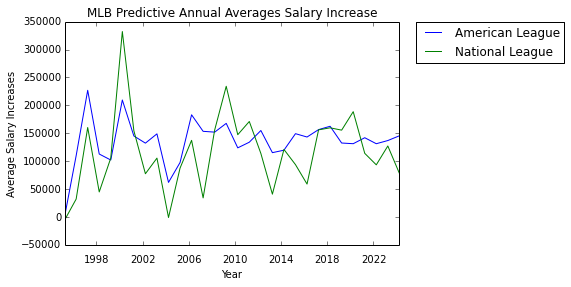

In [40]:
plt.plot(predict_al_increases.index,predict_al_increases, label="American League")
plt.plot(predict_nl_increases.index,predict_nl_increases, label="National League")
plt.rcParams['xtick.major.pad']='15'
plt.title('MLB Predictive Annual Averages Salary Increase')
plt.xlabel('Year')
plt.ylabel('Average Salary Increases')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

#### Step B: Plot comparison between annual league salary increases per year and the predicted growth for each league.

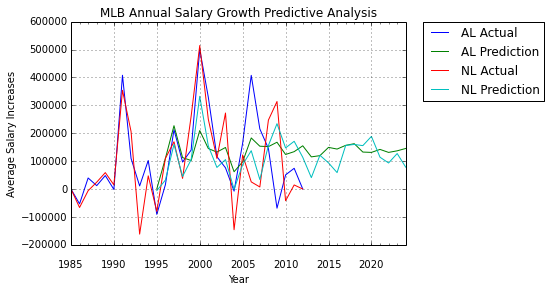

In [41]:
data_to_compare = {'AL Prediction': predict_al_increases,
                   'AL Actual': df_al_annual_salary_inc.alAnnualSalaryIncrease,
                   'NL Prediction': predict_nl_increases,
                   'NL Actual': df_nl_annual_salary_inc.nlAnnualSalaryIncrease
                }
df_annual_growth_predictive_analysis = pd.DataFrame(data_to_compare)
ax = df_annual_growth_predictive_analysis.plot()
ax.set_ylabel('Average Salary Increases')
plt.rcParams['xtick.major.pad']='15'
plt.title('MLB Annual Salary Growth Predictive Analysis')
plt.xlabel('Year')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

## Summary

* Over a 28 year period the actual average increases are a bit sporadic.
* Given the degree of historic fluctuation and the small amount of data, it is difficult to predict future growth.
* The prediction models seem to imply (given the small sample set) a linear regression.

## References

* [Lahman’s Baseball Database](http://seanlahman.com/baseball-archive/statistics/) 
* [Data Analysis Workflow Navigation repository](https://github.com/vinomaster/dawn): This notebook outline was derived from the **Research Analysis Navigation Template**.


<div class="alert" style="border: 1px solid #aaa; background: radial-gradient(ellipse at center, #ffffff 50%, #eee 100%);">
<div class="row">
    <div class="col-sm-1"><img src="https://knowledgeanyhow.org/static/images/favicon_32x32.png" style="margin-top: -6px"/></div>
    <div class="col-sm-11">This notebook was created using <a href="https://knowledgeanyhow.org">IBM Knowledge Anyhow Workbench</a>.  To learn more, visit us at <a href="https://knowledgeanyhow.org">https://knowledgeanyhow.org</a>.</div>
    </div>
</div>